# Домашнее задание 2 (5 баллов).

Все задания ниже имеют равный вес (5/16).

In [163]:
import pandas as pd

#### Описание данных

В папке Dat (https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/Data.zip) находится информация о студентах. Всего 10 групп студентов. Файлы делятся на две категории:
    * Students_info_i - информация о студентах из группы i
    * Students_marks_i - оценки студентов из группы i за экзамены

### Одно из важных достоинств pandas $-$ это удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц: merge, join, concat. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных.

Подробно об этих методах посмотрите тут: https://www.kaggle.com/residentmario/renaming-and-combining#Combining

#### Задание 1. Соберите всю информацию о студентах в одну таблицу df. В получившейся таблице должна быть информация и оценки всех студентов из всех групп. Напечатайте несколько строк таблицы для демонстрации результата.¶

In [164]:
df = pd.DataFrame()

for i in range(10):  # Цикл для заполнения датафрейа

    info_df = pd.read_csv(f'Data 2/Students_info_{i}.csv')
    marks_df = pd.read_csv(f'Data 2/Students_marks_{i}.csv')

    merged_df = pd.concat([info_df, marks_df], axis=1)
    df = pd.concat([df, merged_df])

df.reset_index(drop=True, inplace=True)
df.tail() # Выводим "хвост", чтобы проверить, что индексы были правильно изменены

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,index,math score,reading score,writing score
995,995,female,group E,master's degree,standard,completed,group10,995,88,99,95
996,996,male,group C,high school,free/reduced,none,group10,996,62,55,55
997,997,female,group C,high school,free/reduced,completed,group10,997,59,71,65
998,998,female,group D,some college,standard,completed,group10,998,68,78,77
999,999,female,group D,some college,free/reduced,none,group10,999,77,86,86


#### Задание 2. Удалите столбец index у полученной таблицы. Напечатайте первые 10 строк таблицы.

In [165]:
df = df.drop(['index'], axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,group10,88,99,95
996,male,group C,high school,free/reduced,none,group10,62,55,55
997,female,group C,high school,free/reduced,completed,group10,59,71,65
998,female,group D,some college,standard,completed,group10,68,78,77


#### Задание 3. Выведите на экран размеры полученной таблицы

In [166]:
df.shape

(1000, 9)

#### Задание 4. Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [167]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Задание 5. Проверьте, есть ли в таблице пропущенные значения

In [168]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
group                          0
math score                     0
reading score                  0
writing score                  0
dtype: int64

*Пустые ячейки отсутствуют*

#### Задание 6. Выведите на экран средние баллы студентов по каждому предмету (math, reading, writing)

In [169]:
df.mean(numeric_only=True)

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

**Задание 7. Как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)? Выведите на экран для каждого предмета в отдельности средний балл студентов, проходивших курс для подготовки к экзамену и не проходивших курс.**

In [170]:
df[df['test preparation course'] == 'completed'].mean(numeric_only=True)

math score       69.695531
reading score    73.893855
writing score    74.418994
dtype: float64

*Оценка по каждому предмету выше у тех, кто проходил курсподготовки*

**Задание 8. Выведите на экран все различные значения из столбца lunch.**

In [172]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

**Задание 9. Переименуйте колонку "parental level of education" в "education", а "test preparation course" в "test preparation" с помощью метода pandas rename**
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [173]:
df = df.rename(columns={'parental level of education': 'education', 'test preparation course': 'test preparation'})
df

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,group10,88,99,95
996,male,group C,high school,free/reduced,none,group10,62,55,55
997,female,group C,high school,free/reduced,completed,group10,59,71,65
998,female,group D,some college,standard,completed,group10,68,78,77


**Зафиксируем минимальный балл для сдачи экзамена**

In [174]:
passmark = 50

**Задание 10. Ответьте на вопросы:**
    * Какая доля студентов сдала экзамен по математике (passmark >= 50)?
    * Какая доля студентов, проходивших курс подготовки к экзамену, сдала экзамен по математике?
    * Какая доля женщин, не проходивших курс подготовки к экзамену, не сдала экзамен по математике? 

In [175]:
math_pass = len(df[df['math score'] >= passmark])
print(f'Доля студентов, сдавших математику: {math_pass/len(df)}.')

df_prep = df[df['test preparation'] == 'completed'] # Только те студенты, которые прошли подготовительные курсы
math_pass_prep = len(df_prep[df_prep['math score'] >= passmark])
print(f'Доля студентов, прошедших курс подготовки и сдавших математику: {math_pass_prep/len(df_prep)}.')

df_women = df[(df['gender'] == 'female') & (df['test preparation'] != 'completed')] # Только девушки, не проходившие курс подготовки
math_fail_women = len(df_women[df_women['math score'] < passmark])
print(f'Доля женщин, не прошедших курс подготовки и не сдавших математику: {math_fail_women/len(df_women)}.')

Доля студентов, сдавших математику: 0.865.
Доля студентов, прошедших курс подготовки и сдавших математику: 0.9217877094972067.
Доля женщин, не прошедших курс подготовки и не сдавших математику: 0.20958083832335328.


**Задание 11. С помощью groupby выполните задания ниже. Также выведите время выполнения каждого из заданий.**
    * Для каждой этнической группы выведите средний балл за экзамен по чтению
    * Для каждого уровня образования выведите минимальный балл за экзамен по письму

In [205]:
from time import time # Импортируем функцию time() из библиотеки time для подсчета времени выполнения

start = time()
avg_reading = df.groupby(by = 'race/ethnicity')['reading score'].agg('mean') # Получаем средний балл экзамена по чтению для каждой этнической группы
stop = time()
first_group  = stop - start
print('Средний балл экзамена по чтению:\n', avg_reading,'\n')

start = time()
min_writing = df.groupby(by = 'education')['writing score'].agg('min') # Получаем минимальный балл экзамена по письму для каждого уровня образования
stop = time()
second_group  = stop - start
print('Минимальный балл экзамена по письму:\n',min_writing,'\n')

Средний балл экзамена по чтению:
 race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64 

Минимальный балл экзамена по письму:
 education
associate's degree    35
bachelor's degree     38
high school           15
master's degree       46
some college          19
some high school      10
Name: writing score, dtype: int64 



In [206]:
print(f'Время выполнения первой группировки: {first_group} секунд')
print(f'Время выполнения первой группировки: {second_group} секунд')

Время выполнения первой группировки: 0.0008459091186523438 секунд
Время выполнения первой группировки: 0.0007851123809814453 секунд


**Задание 12. Выполните задание 11 с помощью циклов. Сравните время выполнения.**

In [207]:
# Словари для хранения результатов
avg_reading_c = {}
min_writing_c = {}

# Получаем средний балл экзамена по чтению для каждой этнической группы (при помощи цикла)
start = time()
for eth in df['race/ethnicity'].unique():
    avg_reading_c[eth] = df[df['race/ethnicity'] == eth]['reading score'].mean()
stop = time()
first_cycle = stop - start

# Получаем минимальный балл экзамена по письму для каждого уровня образования (при помощи цикла)
start = time()
for edu in df['education'].unique():
    min_writing_c[edu] = df[df['education'] == edu]['writing score'].min()
stop = time()
second_cycle = stop - start

print('Средний балл экзамена по чтению:')
for eth, score in avg_reading_c.items():
    print(eth, ':', score)
print()

print('Минимальный балл экзамена по письму:')
for edu, score in min_writing_c.items():
    print(edu, ':', score)
print()

Средний балл экзамена по чтению:
group B : 67.35263157894737
group C : 69.10344827586206
group A : 64.67415730337079
group D : 70.03053435114504
group E : 73.02857142857142

Минимальный балл экзамена по письму:
bachelor's degree : 38
some college : 19
master's degree : 46
associate's degree : 35
high school : 15
some high school : 10



In [208]:
print(f'Время выполнения первого цикла: {first_cycle} секунд')
print(f'Время выполнения второго цикла: {second_cycle} секунд')
print(f'В среднем циклы медленнее группировок в {((first_cycle+second_cycle)/2) / ((first_group+second_group)/2)} раз.') # Сравниваем времена выполнения как отношение их средних арифметических

Время выполнения первого цикла: 0.0029997825622558594 секунд
Время выполнения второго цикла: 0.002847909927368164 секунд
В среднем циклы медленнее группировок в 3.585294547580763 раз.


*Вывод: хуже циклов могут быть только вложенные циклы*

**Задание 13. Выведите на экран средние баллы студентов по каждому предмету в зависимости от пола и уровня образования. То есть должно получиться количество групп, равных 2 * (число уровней образования), и для каждой такой группы выыведите средний балл по каждому из предметов.**

Это можно сделать с помощью сводных таблиц (pivot_table):

https://www.kaggle.com/kamilpolak/tutorial-how-to-use-pivot-table-in-pandas

In [209]:
avgs = df.groupby(['gender', 'education']).agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'}) # Группируем по двум столбцам и применяем к числовым столбцам агрегацию — среднее арифметическое
print(avgs)

                           math score  reading score  writing score
gender education                                                   
female associate's degree   65.250000      74.120690      74.000000
       bachelor's degree    68.349206      77.285714      78.380952
       high school          59.351064      68.202128      66.691489
       master's degree      66.500000      76.805556      77.638889
       some college         65.406780      73.550847      74.050847
       some high school     59.296703      69.109890      68.285714
male   associate's degree   70.764151      67.433962      65.405660
       bachelor's degree    70.581818      68.090909      67.654545
       high school          64.705882      61.480392      58.539216
       master's degree      74.826087      73.130435      72.608696
       some college         69.009259      64.990741      63.148148
       some high school     67.840909      64.693182      61.375000


#### Задание 14. Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице df под названием Math_PassStatus и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

Сделайте аналогичные шаги для экзаменов по чтению и письму.

In [210]:
df['Math_PassStatus'] = df.apply(lambda row: 'F' if (row['math score'] < passmark) else 'P', axis=1)
df['Reading_PassStatus'] = df.apply(lambda row: 'F' if (row['reading score'] < passmark) else 'P', axis=1)
df['Writing_PassStatus'] = df.apply(lambda row: 'F' if (row['writing score'] < passmark) else 'P', axis=1)

df['Math_PassStatus'].value_counts()

P    865
F    135
Name: Math_PassStatus, dtype: int64

#### Задание 15. Сколько студентов успешно сдали все экзамены?

Создайте столбец OverAll_PassStatus и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [223]:
df['OverAll_PassStatus'] = df.apply(lambda row: 'F' if 'F' in row[9:12].values else 'P', axis=1) # Math_PassStatus, Reading_PassStatus и Writing_PassStatus — это столбцы 9-12
df['OverAll_PassStatus'].value_counts()['P'] # Не хочу опять юзать len))

812

#### Задание 16. Переведем баллы в оценки

### Система перевода баллов в оценки
####    больше 90 = A
####      80-90 = B
####      70-80 = C
####      60-70 = D
####      50-60 = E
####    меньше 50 = F (Fail)

Создайте вспомогательную функцию, которая будет по среднему баллу за три экзамена выставлять оценку студенту по данным выше критериям.

Создайте столбец Grade и запишите в него оценку каждого студента.

Выведите количество студентов, получивших каждую из оценок.

**В случае, если средний балл попадает на границу между оценками (т.е. равен ровно 60, 70 или 80 баллов), вы можете интерпретировать условие на своё усмотрение (т.е. можете поставить за 60 баллов оценку D, а можете - E).**

In [224]:
def GetGrade(average_mark): # Функция распределения оценок (граничные округляем вверх — мы же не тираны!)
    if average_mark > 90:
        return 'A'
    if 80 <= average_mark <= 90:
        return 'B'
    if 70 <= average_mark < 80:
        return 'C'
    if 60 <= average_mark < 70:
        return 'D'
    if 50 <= average_mark < 60:
        return 'E'
    else:
        return 'F'

In [225]:
from statistics import mean
df['Grade'] = df.apply(lambda row: GetGrade(mean(row[6:9].values)), axis=1) # Применяем кастомную функцию распределения к средней оценке студента (оценки хранится в столбцах 6-9)
df['Grade'].value_counts()

C    261
D    256
E    182
B    148
F    103
A     50
Name: Grade, dtype: int64

<Axes: >

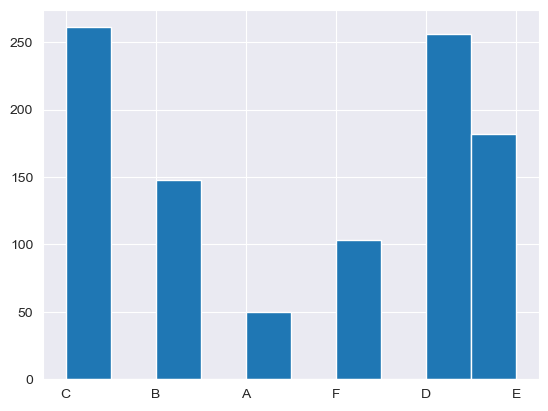

In [226]:
df['Grade'].hist() # Показываем на гистограмме распределение оценок по студентам